![header_image](https://i.imgur.com/D78YdSK.png)

<div style="font-size:15px; text-align:justify">
<p>This notebook is using the <em><b><a style="color:#ffbf00;" href="https://www.kaggle.com/competitions/new-york-city-taxi-fare-prediction">New York Taxi Fare Dataset</a></b></em> taken from the playground competition, hosted in partnership with Google Cloud and Coursera, tasked for predicting the <em><b style="color:#ffbf00;">fare amount (inclusive of tolls) for a taxi ride in New York City</b></em> given the pickup and dropoff locations.</p>

<p>So, in this notebook we can do a lot more about the analysis especially with <em><b style="color:#ffbf00;">Geospatial Analysis along with the EDA</b></em> and later we will predict the Fare price with the help of the given data using the simple <em><b style="color:#ffbf00;">Linear Regression algorithm</b></em>.</p>

<p>Also, during time of exceution of this notebook it has been <em><b style="color:#ffbf00;">crashed multiple going out of memory due to the large amount of data from the dataset (Size: 5.7 GB, Rows[train dataset]: 55M rows)</b></em> therefore the the size by taking only a <em><b style="color:#ffbf00;">random sample of 100000 rows and then only the Year having the highest traffic</b></em>.</p>

<em><b>**Note: This notebook is created by getting inspired from the <big>https://www.kaggle.com/code/breemen/nyc-taxi-fare-data-exploration?kernelSessionId=5341553</big> notebook</b></em>
</div>

<div style="background:#ffbf00; height:65px; width:65px; margin:0 0 -70px -10px;"></div>
<div style="background:url('https://media.tenor.com/iJCvfF7m650AAAAC/bugcat-capoo.gif') no-repeat; height:60px; margin-bottom:-65px; background-size:contain; background-position:right;"></div>

## Table of Contents

<div style="background:#ffbf00; height:3px; width:70%; margin-left:-10px"></div>
<br>


1. [Data Exploration](#dtExplore)
2. [Feature Enginnering](#FEng)<br>
    2.1. [Lets get a random sample of 10000](#rndsample)<br>
    2.2. [Separate the date, time and hour from the pickup time](#dth_sep)<br>
    2.3. [Measure the Distance(miles) from the latitude and longitude for both pickup and dropoff](#mDis)    
3. [Data Cleaning](#dClean)<br>
    3.1. [Removing the coloumns with null values](#rColms)<br>
    3.2. [Removing the fare price less than zero](#fZero)<br>
    3.3. [Removing the distance(mile) less than zero](#rDisM)<br>
    3.4. [Removing the key and pickup_datetime coloumn from the dataset](#rKeyPickDT)<br>    
4. [Data Visualisation](#dVis)<br>
    4.1. [Visualize the geospatial locations for the pickup points](#visGeoLPick)<br>
    4.2. [Visualize the geospatial locations for the dropoff points](#visGeoLDrop)<br>
    4.3. [Histrogram plot of fare price](#visHFPrice)<br>
    4.4. [Barplot for visualizing the number of rides in the following years](#visBarNRides)<br> 
    4.4.a. [Traffic in the year 2012](#TYrs2012)<br>
    4.4.b. [Lets see the peaks days with their rush hours of year 2012](#visPRushHr)<br>
    4.4.b1. [Visualize the rush hours for monday](#visRHrM)<br>
    4.4.b2. [Visualize the rush hours for tuesday](#visRHrT)<br> 
    4.4.b3. [Visualize the rush hours for sunday](#visRHrS)<br>
    4.4.c. [Histrogram plot for the distances(mile) travelled](#HDisMT)<br>
    4.4.d. [Scatter plot visualization between Fare(in $USD) vs Distance(in Miles) of year 2012](#visSFvD)<br>
5. [Model](#model)<br>
    5.1. [Generate the test data](#genTData)<br>
    5.2. [Train, test split of the datasets](#dSplit)<br>
    5.3. [Model Run](#mRun)<br>
    5.4. [Model Score](#mScore)<br>
    5.4. [Model Save](#mSave)<br>
7. [Conclusion](#conclusion)

<div style="background:#ffbf00; height:20px; width:100%"></div>

<div style="font-size:15px; text-align:center">
<img src="https://media.tenor.com/UsdWzL1kFO4AAAAi/alex-geerken-geerken.gif"/>
  
<br>    
<strong><em>Lets, hop in and get our hands dirty in data</em></strong>... 🥴</div>

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import plotly_express as px
import seaborn as sns

palette = sns.color_palette("rainbow", 8)


import warnings
warnings.filterwarnings("ignore")

<a id="dtExplore"></a>
<div style="background:#ffbf00; height:65px; width:65px; margin:0 0 -70px -10px;"></div>
<div style="background:url('https://media.tenor.com/IJcsTlES7EkAAAAi/dayskomvis-gass.gif') no-repeat; height:60px; margin-bottom:-65px; background-size:contain; background-position:right"></div>

## 1. Data Exploration

<div style="background:#ffbf00; height:3px; width:70%; margin-left:-10px"></div>

In [2]:
df = pd.read_csv('/kaggle/input/new-york-city-taxi-fare-prediction/train.csv')

In [3]:
df.shape

(55423856, 8)

In [4]:
df.head(10).style.set_properties(**{'background-color': '#ffe100','color': '#000','border': '1px solid #000000'})

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55423856 entries, 0 to 55423855
Data columns (total 8 columns):
 #   Column             Dtype  
---  ------             -----  
 0   key                object 
 1   fare_amount        float64
 2   pickup_datetime    object 
 3   pickup_longitude   float64
 4   pickup_latitude    float64
 5   dropoff_longitude  float64
 6   dropoff_latitude   float64
 7   passenger_count    int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 3.3+ GB


In [6]:
df.describe()

fare_amount  pickup_longitude  pickup_latitude  dropoff_longitude  \
count  5.542386e+07      5.542386e+07     5.542386e+07       5.542348e+07   
mean   1.134505e+01     -7.250968e+01     3.991979e+01      -7.251121e+01   
std    2.071083e+01      1.284888e+01     9.642353e+00       1.278220e+01   
min   -3.000000e+02     -3.442060e+03    -3.492264e+03      -3.442025e+03   
25%    6.000000e+00     -7.399207e+01     4.073493e+01      -7.399140e+01   
50%    8.500000e+00     -7.398180e+01     4.075265e+01      -7.398015e+01   
75%    1.250000e+01     -7.396708e+01     4.076713e+01      -7.396367e+01   
max    9.396336e+04      3.457626e+03     3.408790e+03       3.457622e+03   

       dropoff_latitude  passenger_count  
count      5.542348e+07     5.542386e+07  
mean       3.992068e+01     1.685380e+00  
std        9.633346e+00     1.327664e+00  
min       -3.547887e+03     0.000000e+00  
25%        4.073403e+01     1.000000e+00  
50%        4.075316e+01     1.000000e+00  
75%        4.076810e+01     2.000000e+00  
max        3.537133e+03     2.080000e+02

In [7]:
df.isnull().sum()

key                    0
fare_amount            0
pickup_datetime        0
pickup_longitude       0
pickup_latitude        0
dropoff_longitude    376
dropoff_latitude     376
passenger_count        0
dtype: int64

<a id="FEng"></a>
<div style="background: #ffbf00; height:65px; width:65px; margin:0 0 -70px -10px;"></div>
<div style="background:url('https://media.tenor.com/PjcIPM1Ba00AAAAi/tf2-tf2dance.gif') no-repeat; height:60px; margin-bottom:-65px; background-size:contain; background-position:right"></div>

## 2. Feature Enginnering
<div style="background:#ffbf00; height:3px; width:70%; margin-left:-10px"></div>

<br>
<a id="rndsample"></a>
<div style="background: #ffbf00; height:30px; width:50%; margin:0 0 -50px -10px;"></div>

###  2. 1. Lets get a <em><b>random sample of 10000</b></em>

In [8]:
rn_sample_df = df.sample(100000)

<a id="dth_sep"></a>
<div style="background: #ffbf00; height:30px; width:60%; margin:0 0 -50px -10px;"></div>

### 2. 2 Separate the <b><em>date, time and hour</em></b> from the pickup time

In [9]:
rn_sample_df['pickup_datetime'] = pd.to_datetime(rn_sample_df['pickup_datetime'], format= "%Y-%m-%d %H:%M:%S UTC")

# 2009-06-15 17:26:21 UTC
# add time information
rn_sample_df['year'] = rn_sample_df.pickup_datetime.apply(lambda t: t.year)
rn_sample_df['weekday'] = rn_sample_df.pickup_datetime.apply(lambda t: t.weekday())
rn_sample_df['hour'] = rn_sample_df.pickup_datetime.apply(lambda t: t.hour)

<a id="mDis"></a>
<div style="background: #ffbf00; height:30px; width:90%; margin:0 0 -50px -10px;"></div>

### 2. 3. Measure the <b><em>Distance(miles)</em></b> from the latitude and longitude for both pickup and dropoff

Calculate the distance in miles between locations in lon,lat coordinates using <b>haversine formula</b>.

In [10]:
def distance(lat1, lon1, lat2, lon2):
    
    p = 0.017453292519943295 # Pi/180
    a = 0.5 - np.cos((lat2 - lat1) * p)/2 + np.cos(lat1 * p) * np.cos(lat2 * p) * (1 - np.cos((lon2 - lon1) * p)) / 2
    return 0.6213712 * 12742 * np.arcsin(np.sqrt(a)) # 2*R*asin...

In [11]:
rn_sample_df['distance'] = distance(rn_sample_df.pickup_latitude, rn_sample_df.pickup_longitude, 
                                    rn_sample_df.dropoff_latitude, rn_sample_df.dropoff_longitude)

<a id="dClean"></a>
<div style="background: #ffbf00; height:65px; width:65px; margin:0 0 -70px -10px;"></div>
<div style="background:url('https://media.tenor.com/hwlmo8eXUPEAAAAi/levi-attack-on-titan.gif') no-repeat; height:60px; margin-bottom:-65px; background-size:contain; background-position:right"></div>

## 3. Data Cleaning
<div style="background:#ffbf00; height:3px; width:70%; margin-left:-10px;"></div>

<br>

<a id="rColms"></a>
<div style="background: #ffbf00; height:30px; width:50%; margin:0 0 -50px -10px;"></div>

### 3. 1. Removing the coloumns with <b><em>null</em></b> values
Lets start with removing the null values from the <b><em>rn_sample_df</em></b> sample dataset

In [12]:
rn_sample_df = rn_sample_df.dropna()

<a id="fZero"></a>
<div style="background: #ffbf00; height:30px; width:50%; margin:0 0 -50px -10px;"></div>

### 3. 2. Removing the <em><b>fare</b></em> price less than zero
As we have already seen that the fare price is gone below zero using the dataset description, so now remove them

In [13]:
rn_sample_df = rn_sample_df[rn_sample_df.fare_amount > 0]

<a id="rDisM"></a>
<div style="background: #ffbf00; height:30px; width:50%; margin:0 0 -50px -10px;"></div>

### 3. 3. Removing the <em><b>distance(mile)</b></em> less than zero

In [14]:
rn_sample_df = rn_sample_df[rn_sample_df.distance > 0]

<a id="rKeyPickDT"></a>
<div style="background: #ffbf00; height:30px; width:80%; margin:0 0 -50px -10px;"></div>

### 3. 4. Removing the <b><em>key and pickup_datetime</em></b> coloumn from the dataset
As we already got the date and time from pickup_datetime, so now there is no need of key and pickup_datetime

In [15]:
# now removing the key and pickup_datetime coloumn from the dataset
rn_sample_df = rn_sample_df.drop(['key', 'pickup_datetime'], axis=1)

<a id="dVis"></a>
<div style="background:#ffbf00; height:65px; width:65px; margin:0 0 -70px -10px;"></div>
<div style="background:url('https://media.tenor.com/3IACtMvxwdsAAAAi/pikachu-happy.gif') no-repeat; height:60px; margin-bottom:-65px; background-size:contain; background-position:right"></div>

## 4. Data Visualisation
<div style="background:#ffbf00; height:3px; width:70%; margin-left:-10px"></div>

In [16]:
rn_sample_df.head()

fare_amount  pickup_longitude  pickup_latitude  dropoff_longitude  \
7068339          10.1        -73.981255        40.764352         -73.990375   
398316           14.5        -73.955302        40.770057         -73.977725   
52096861          9.0        -73.986420        40.743257         -73.996380   
11283447          6.5        -74.008514        40.734955         -73.993233   
45005685          9.4        -73.981180        40.746987         -73.953470   

          dropoff_latitude  passenger_count  year  weekday  hour  distance  
7068339          40.740405                1  2011        1    16  1.722093  
398316           40.736615                1  2013        0    16  2.591591  
52096861         40.739597                1  2014        2    10  0.579489  
11283447         40.737450                1  2015        4     9  0.818409  
45005685         40.776821                1  2009        3    22  2.520324

<a id="visGeoLPick"></a>
<div style="background: #ffbf00; height:30px; width:60%; margin:0 0 -50px -10px;"></div>


### 4. 1. Visualize the <em><b>geospatial locations</b></em> for the <b><em>pickup</em></b> points

In [17]:
tPickup_fig = px.scatter_mapbox(rn_sample_df, lat='pickup_latitude', lon='pickup_longitude', hover_name='fare_amount', hover_data=['fare_amount'],
    color='fare_amount',color_continuous_scale=px.colors.sequential.Agsunset, opacity=.05,
    center={'lat': 40.75, 'lon': 286.051}, 
    zoom=11,
    height=500,width=1180,
    mapbox_style="carto-positron", labels=None)
tPickup_fig.update_layout(margin={"r": 0, "t": 0, "l": 0, "b": 0}).update_coloraxes(showscale=False)
tPickup_fig.show()

<a id="visGeoLDrop"></a>
<div style="background: #ffbf00; height:30px; width:60%; margin:0 0 -50px -10px;"></div>

### 4. 2. Visualize the <em><b>geospatial locations</b></em> for the <em><b>dropoff</b></em> points

In [18]:
tDropoff_fig = px.scatter_mapbox(rn_sample_df, lat='dropoff_latitude', lon='dropoff_longitude', hover_name='fare_amount', hover_data=['fare_amount'],
    color='fare_amount',color_continuous_scale=px.colors.sequential.Rainbow_r, opacity=0.1,
    center={'lat': 40.75, 'lon': 286.051},
    zoom=11,
    height=500,width=1180,
    mapbox_style="carto-positron", labels=None)
tDropoff_fig.update_layout(margin={"r": 0, "t": 0, "l": 0, "b": 0}).update_coloraxes(showscale=False)
tDropoff_fig.show()

<a id="visHFPrice"></a>
<div style="background: #ffbf00; height:30px; width:50%; margin:0 0 -50px -10px;"></div>

### 4. 3. Histrogram plot of <b><em>fare</em></b> price

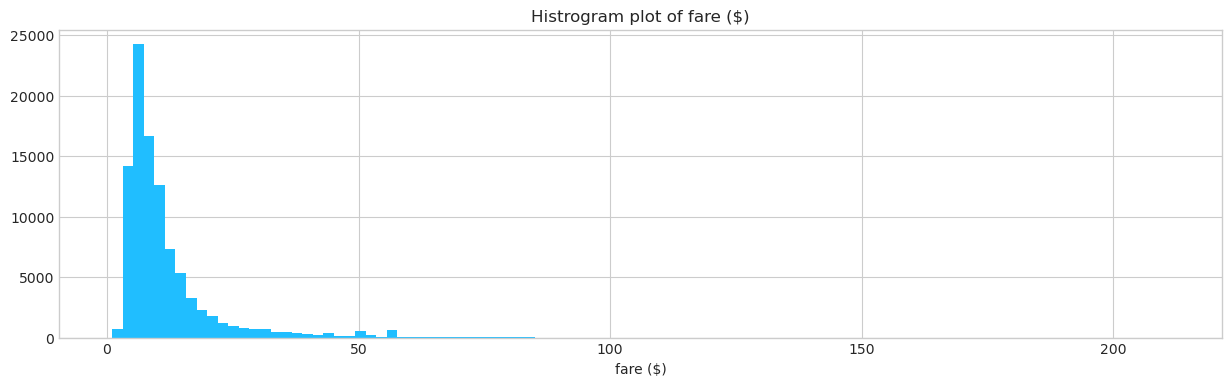

In [19]:
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(15, 4))

plt.hist(rn_sample_df['fare_amount'], bins=100, color='#20beff')
plt.xlabel("fare ($)")
plt.title("Histrogram plot of fare ($)")
plt.show()

<a id="visBarNRides"></a>
<div style="background: #ffbf00; height:30px; width:70%; margin:0 0 -50px -10px;"></div>

### 4. 4. Barplot for visualizing the <em><b>number of rides</b></em> in the following years

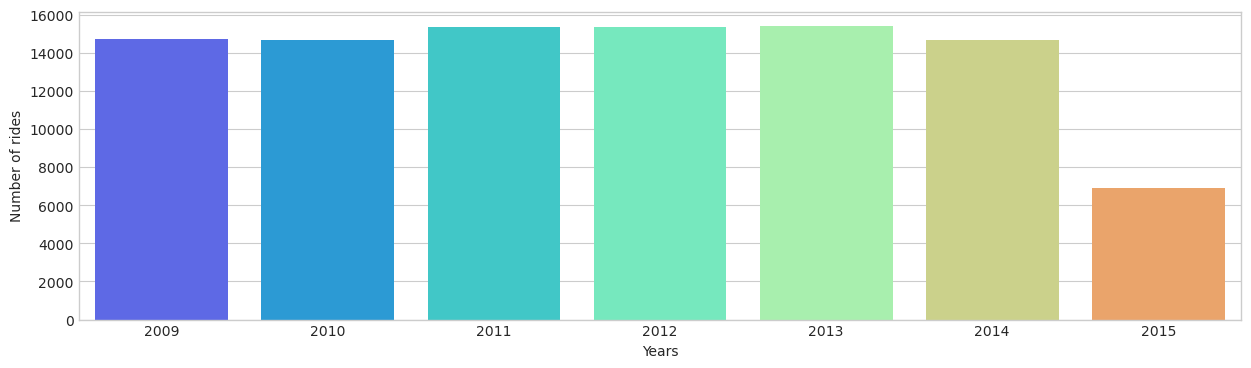

In [20]:
year_insight = rn_sample_df.year.value_counts()

plt.figure(figsize=(15, 4))
sns.barplot(data=rn_sample_df, x=year_insight.index, y=year_insight.values, palette=palette)
plt.ylabel("Number of rides")
plt.xlabel("Years")
plt.show()

<a id="TYrs2012"></a>
<div style="background: #ffbf00; height:30px; width:30%; margin:0 0 -43px -10px;"></div>

#### 4. 4. a. Traffic in the <em><b>year 2012</b></em>

In [21]:
year2012_insight = rn_sample_df[rn_sample_df['year'] == 2012]

In [22]:
xlim = [-74.03, -73.85]
ylim = [40.70, 40.85]

year2012_traffic_insight = year2012_insight.copy()
year2012_insight = year2012_insight[(year2012_insight.pickup_longitude > xlim[0]) & (year2012_insight.pickup_longitude < xlim[1])]
year2012_insight = year2012_insight[(year2012_insight.dropoff_longitude > xlim[0]) & (year2012_insight.dropoff_longitude < xlim[1])]
year2012_insight = year2012_insight[(year2012_insight.pickup_latitude > ylim[0]) & (year2012_insight.pickup_latitude < ylim[1])]
year2012_insight = year2012_insight[(year2012_insight.dropoff_latitude > ylim[0]) & (year2012_insight.dropoff_latitude < ylim[1])]

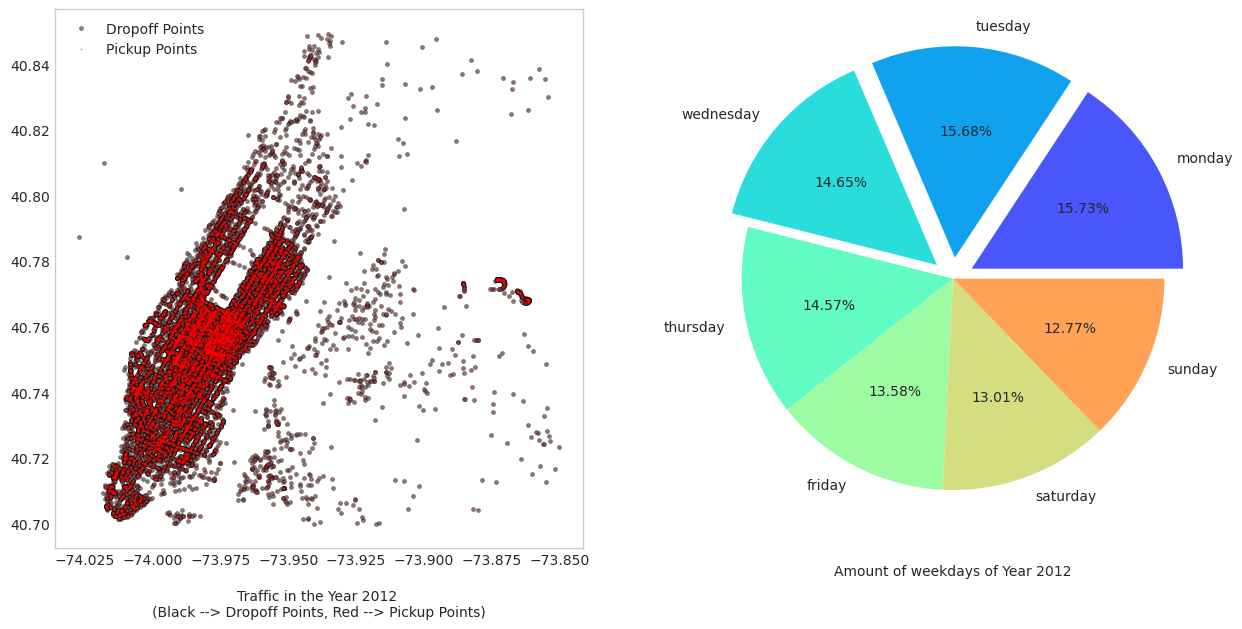

In [23]:
plt.figure(figsize = (15, 7))

plt.subplot(1, 2, 1)
plt.plot(year2012_insight.dropoff_longitude, year2012_insight.dropoff_latitude, 'o', alpha = .5, markersize = 2, color="#fff", markeredgecolor='#000', markeredgewidth=1.5)
plt.plot(year2012_insight.dropoff_longitude, year2012_insight.dropoff_latitude, '.', alpha = .8, markersize = .5, color="red")
plt.legend(['Dropoff Points', "Pickup Points"])
plt.xlabel("\nTraffic in the Year 2012 \n(Black --> Dropoff Points, Red --> Pickup Points)")
plt.grid(False)

plt.subplot(1, 2, 2)
days_list = {'monday' : 0, 'tuesday' : 1, 'wednesday' : 2, 'thursday' : 3, 'friday' : 4, 'saturday' : 5, 'sunday' : 6}
weeklyTraffic = year2012_insight['weekday'].value_counts()
plt.pie(weeklyTraffic.values, labels=days_list, autopct="%.2f%%", explode=[0.1, 0.1, 0.1, 0, 0, 0, 0], colors=palette)
plt.xlabel("\nAmount of weekdays of Year 2012")
plt.show()

In [24]:
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier

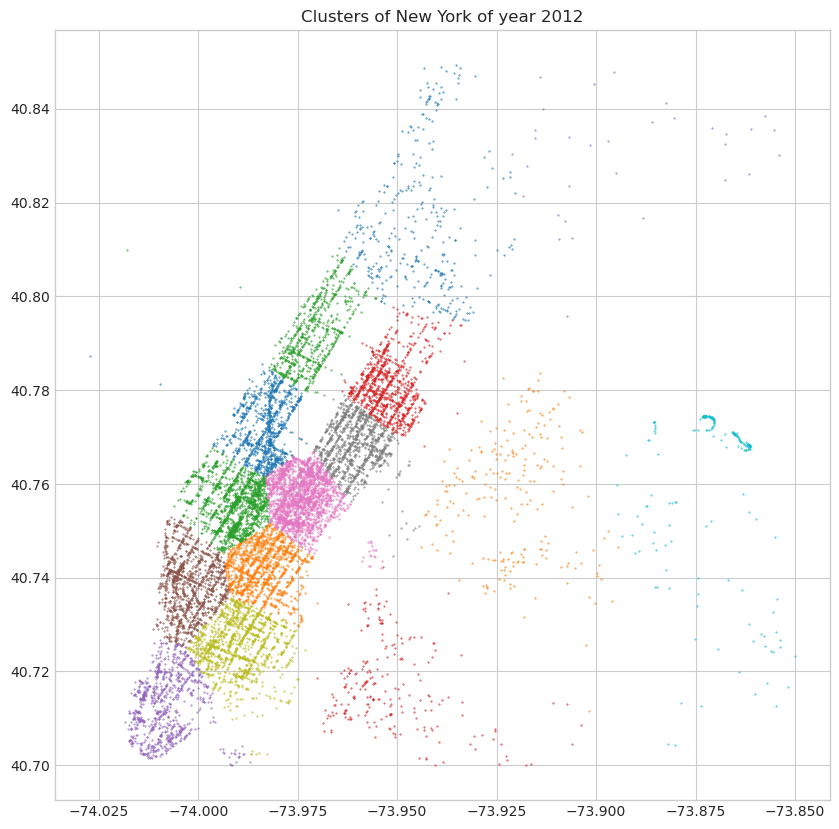

In [25]:
loc_df = pd.DataFrame()
loc_df['longitude'] = year2012_insight.dropoff_longitude
loc_df['latitude'] = year2012_insight.dropoff_latitude


kmeans = KMeans(n_clusters=15, random_state=2, n_init = 10).fit(loc_df)
loc_df['label'] = kmeans.labels_

plt.figure(figsize = (10, 10))
for label in loc_df.label.unique():
    plt.plot(loc_df.longitude[loc_df.label == label],loc_df.latitude[loc_df.label == label],'.', alpha = 1, markersize = 0.8)

plt.title('Clusters of New York of year 2012')
plt.show()

<a id="visPRushHr"></a>
<div style="background: #ffbf00; height:30px; width:60%; margin:0 0 -43px -10px;"></div>

#### 4. 4. b. Lets see the <em><b>peaks days</b></em> with their <em><b>rush hours</b></em> of year 2012

In [26]:
def visualize_peakDaysF(day, color='r'):
    year2012_monday_insight = year2012_insight[year2012_insight["weekday"] == day]
    day_name = list(days_list.keys())[day]
    plt.figure(figsize = (15, 70))
    
    max_pickup, max_pgcnt = 0, 0
    
    for hrs in range(24):
        specDay_traffic = year2012_monday_insight[year2012_monday_insight['hour'] == hrs]
        pickup = len(specDay_traffic)
        pgn_cnt = specDay_traffic["passenger_count"].sum()
        
        
        max_pickup = max(max_pickup, pickup)
        max_pgcnt = max(max_pgcnt, pgn_cnt)


        longitude = list(specDay_traffic.pickup_longitude) + list(specDay_traffic.dropoff_longitude)
        latitude = list(specDay_traffic.pickup_latitude) + list(specDay_traffic.dropoff_latitude)
        plt.subplot(24, 6, hrs+1)

        plt.title("\nHour: " + str(hrs) + " [pickup="+ str(pickup)+",\npassengers count="+ str(pgn_cnt)+"] ", fontsize=12)

        plt.grid(False)
        plt.xticks([])
        plt.yticks([])
        plt.plot(longitude,latitude,'.', alpha = 0.6, markersize = 10, color=color)

#         break
    plt.suptitle("\n"+ day_name.capitalize() +" (max pickups=" + str(max_pickup) + ", max passengers=" + str(max_pgcnt) + ")\n\n\n\n\n\n", fontsize=20)
    plt.tight_layout()
    plt.show()

<a id="visRHrM"></a>
<div style="background: #ffbf00; height:20px; width:40%; margin:0 0 -35px -10px;"></div>

##### 4. 4. b1. Visualize the rush hours for <b><em>monday</em></b>

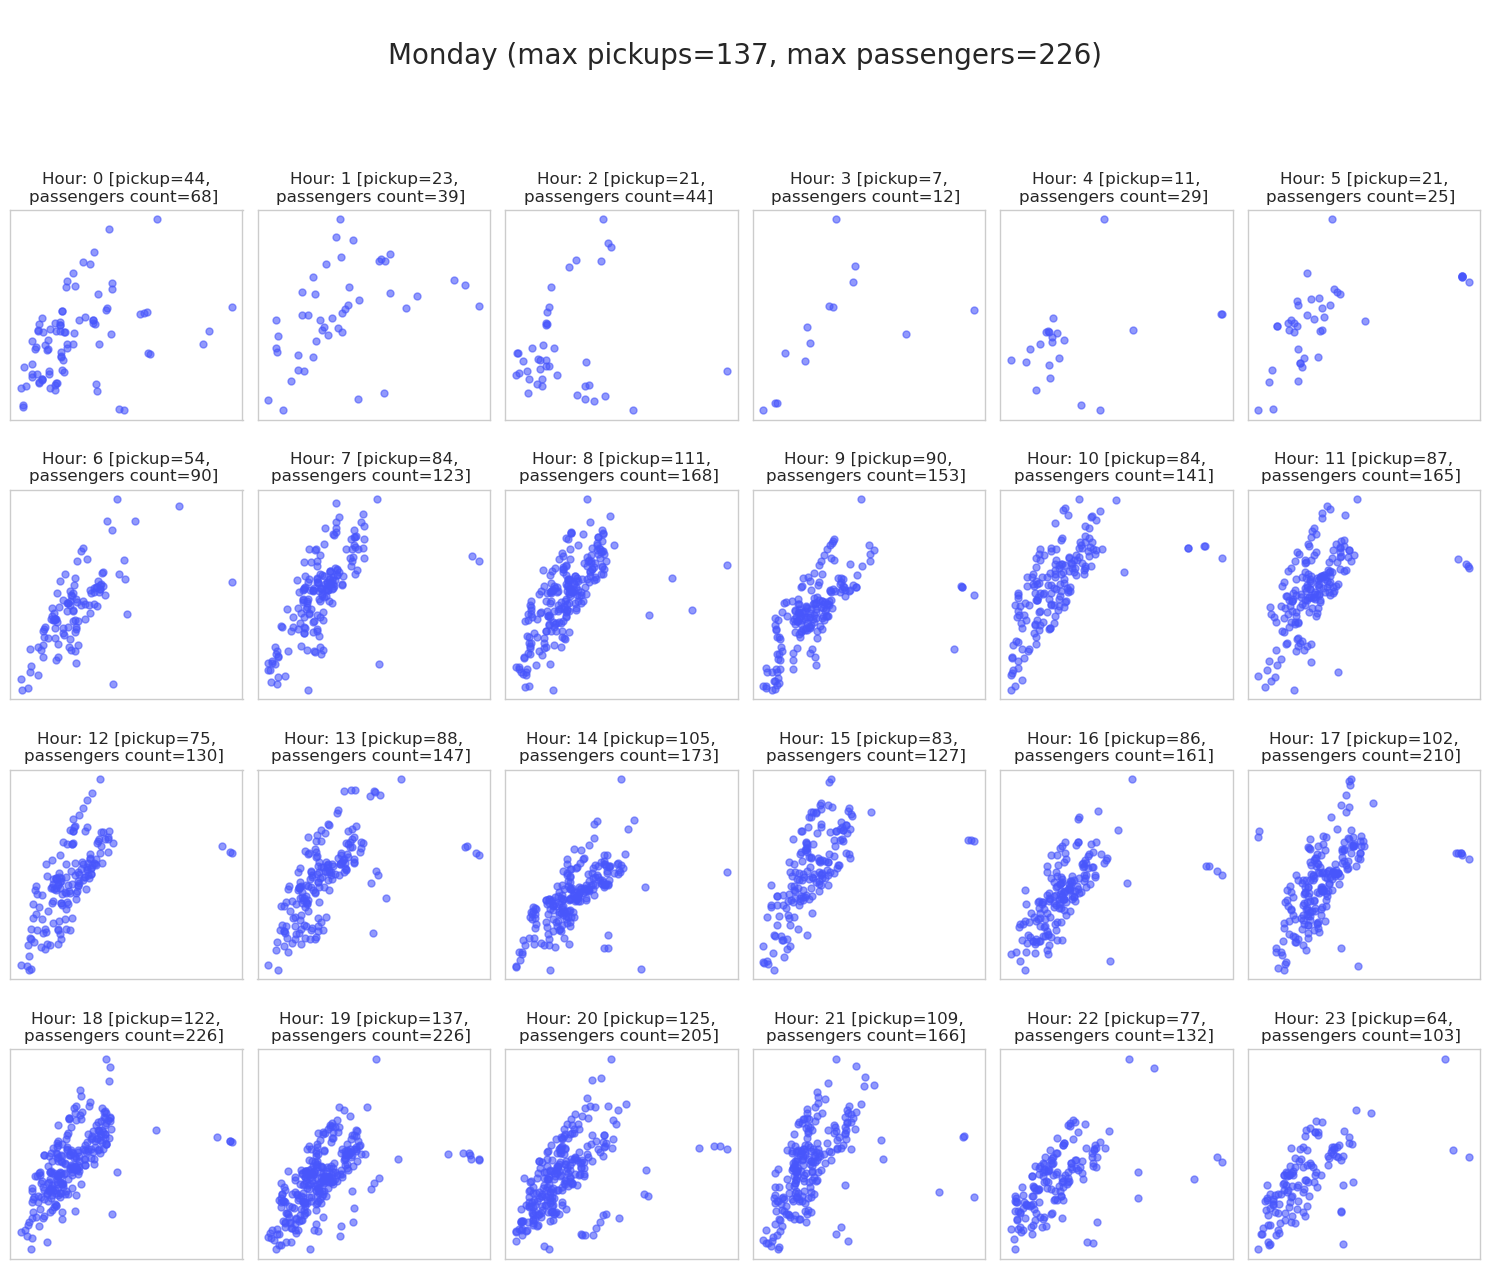

In [27]:
visualize_peakDaysF(0, color='#4856fb')

<a id="visRHrT"></a>
<div style="background: #ffbf00; height:20px; width:40%; margin:0 0 -35px -10px;"></div>

##### 4. 4. b2. Visualize the rush hours for <b><em>tuesday</em></b>

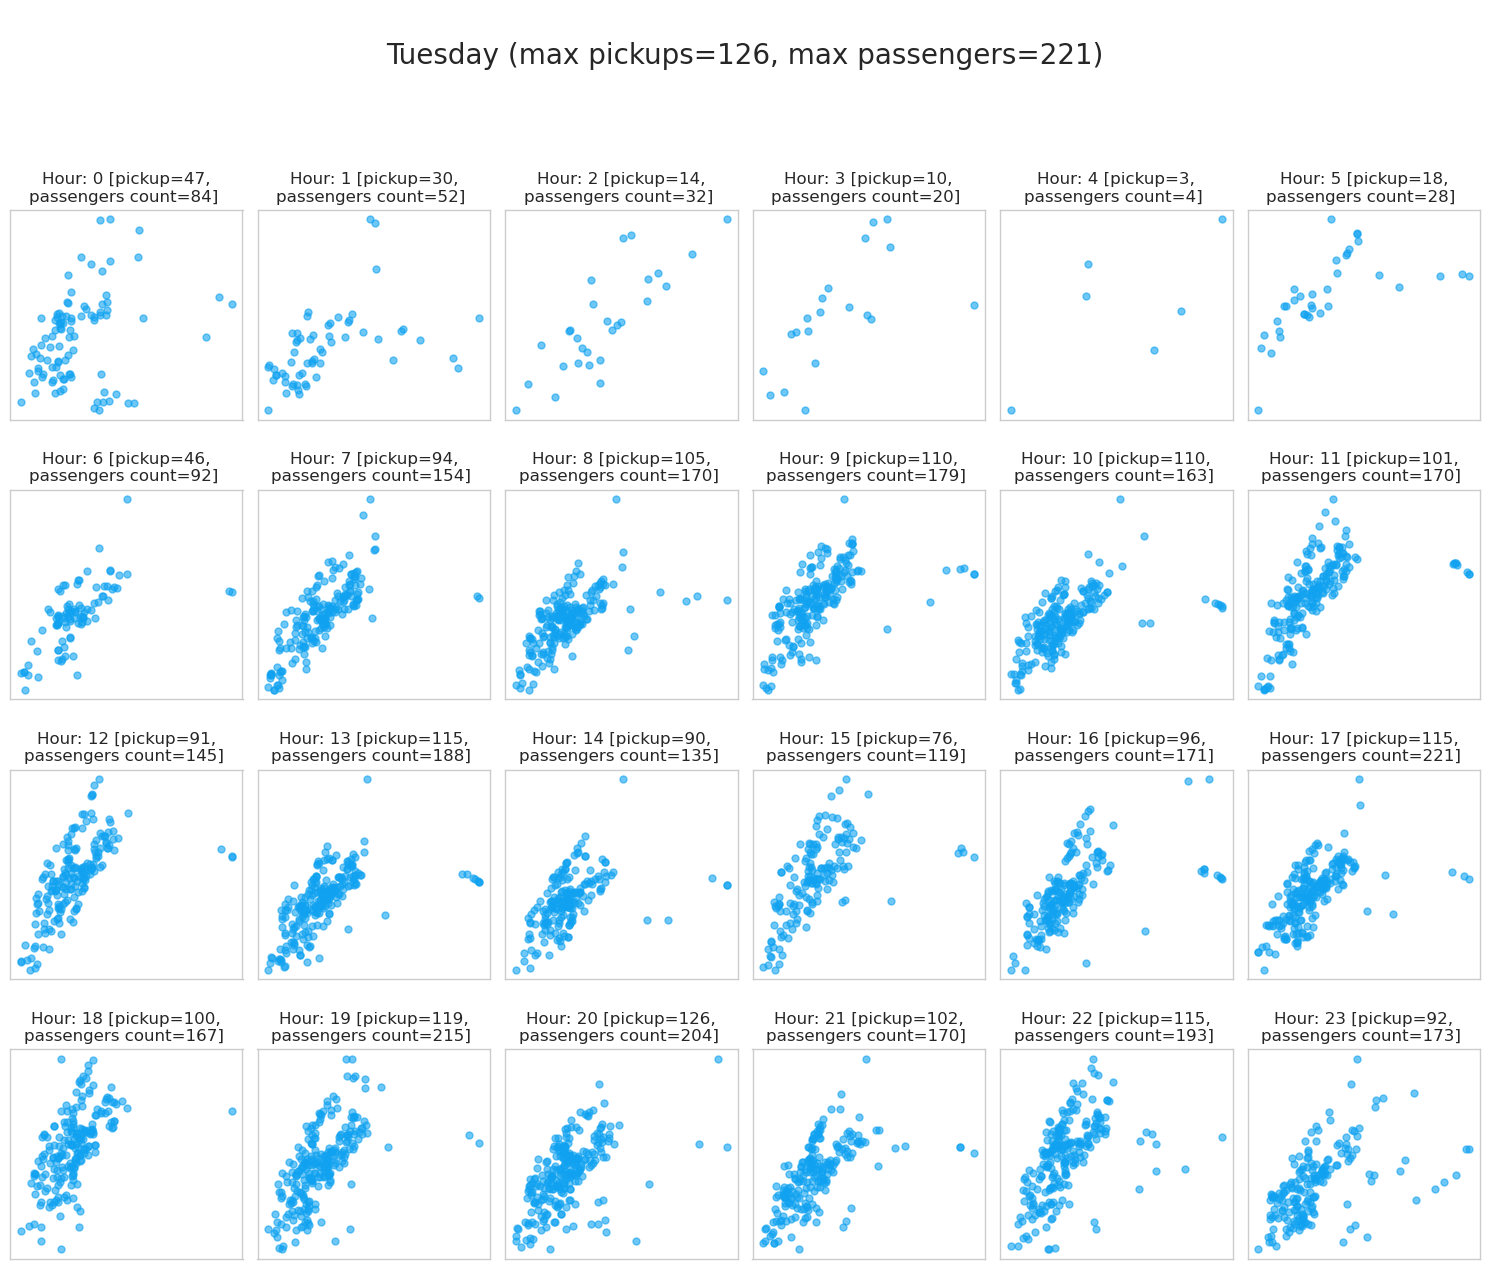

In [28]:
visualize_peakDaysF(1, color='#10a2f0')

<a id="visRHrS"></a>
<div style="background: #ffbf00; height:20px; width:40%; margin:0 0 -35px -10px;"></div>

##### 4. 4. b3. Visualize the rush hours for <em><b>Sunday</b></em>

Now, lets see the rush hours of sunday in which the lowest traffic is generated of the 2011 year

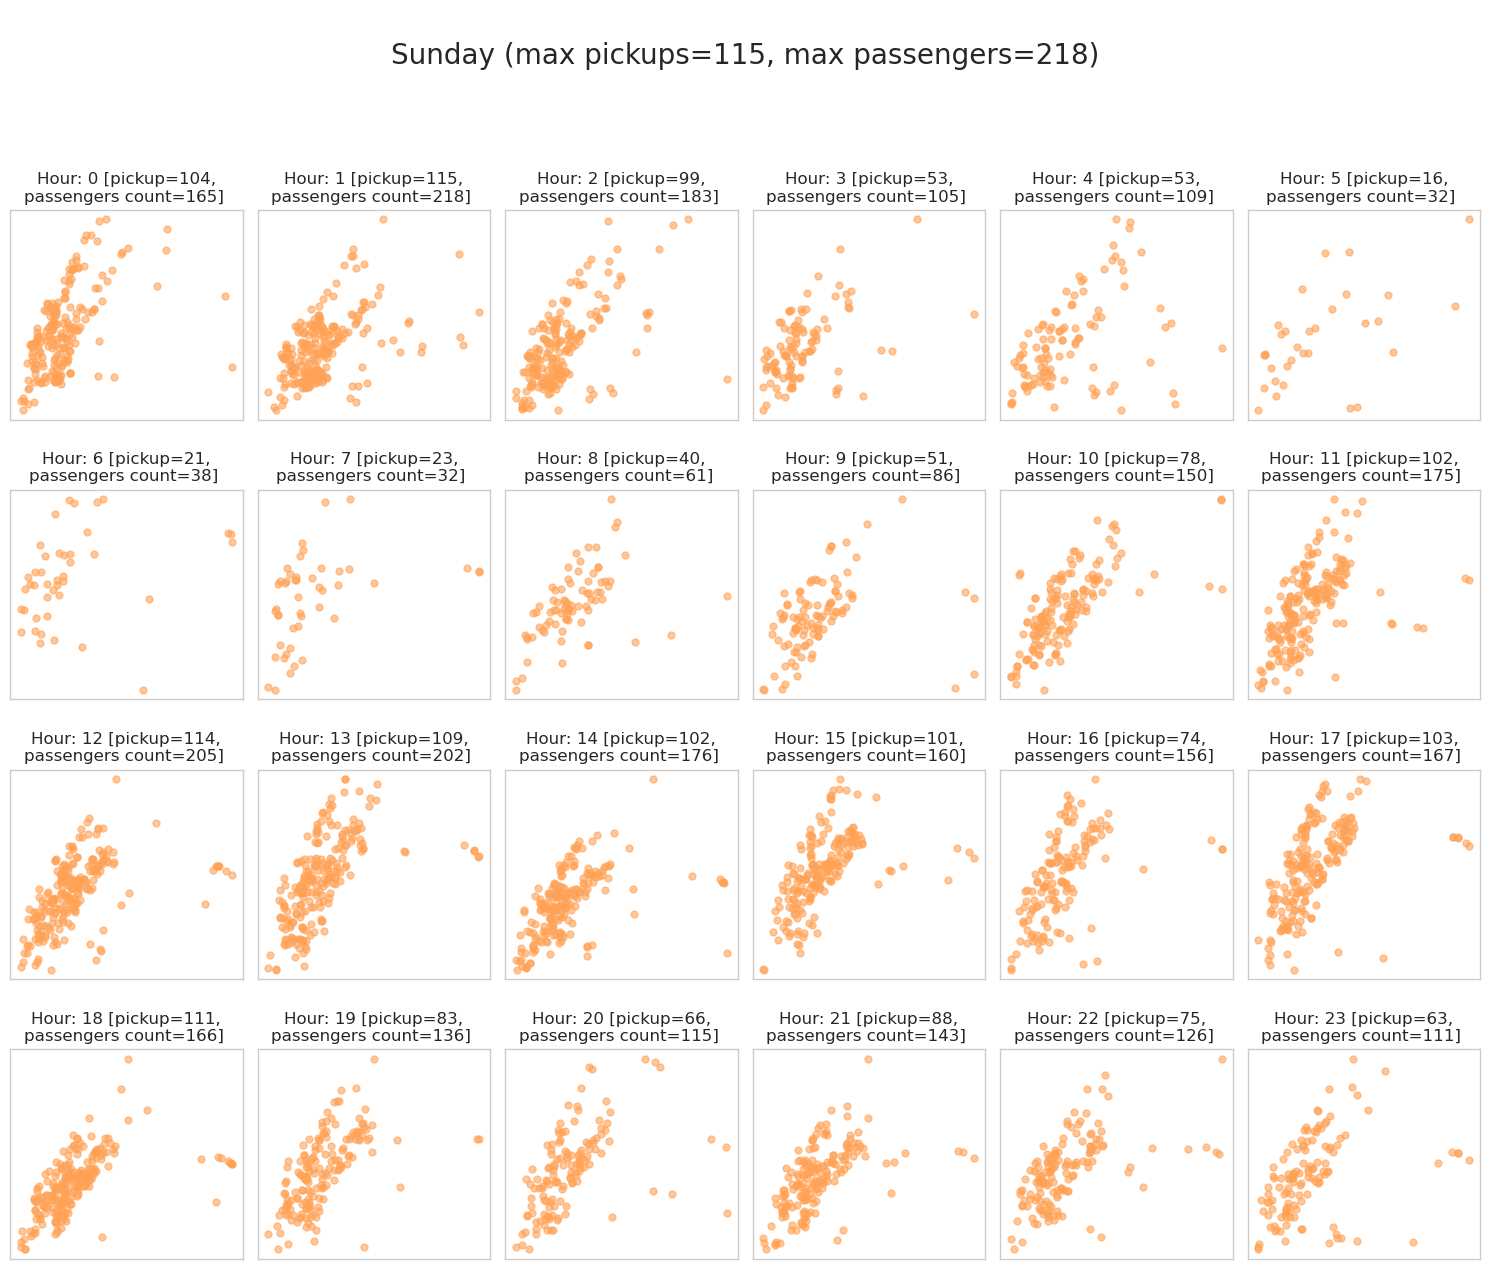

In [29]:
visualize_peakDaysF(6, color='#ffa256')

<a id="HDisMT"></a>
<div style="background: #ffbf00; height:30px; width:60%; margin:0 0 -40px -10px;"></div>

#### 4. 4. c. Histrogram plot for the <b><em>distances(mile)</em></b> travelled

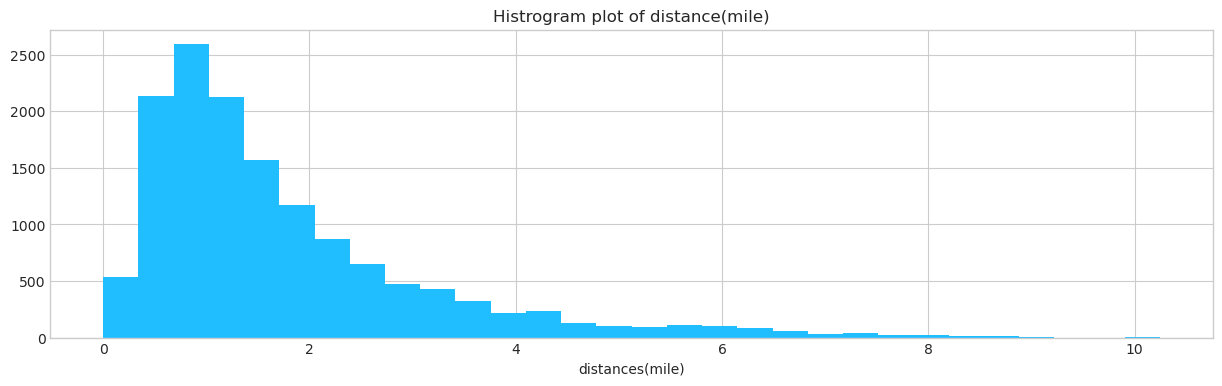

In [30]:
year2012_insight.distance.hist(bins=30, figsize=(15,4), color='#20beff')
plt.xlabel("distances(mile)")
plt.title("Histrogram plot of distance(mile)")
plt.show()

<em>This histrogram gives us a veiw that most of the ride taken was a <b>short ride</b></em>

In [31]:
year2012_insight.groupby('passenger_count')['distance', 'fare_amount'].mean()

distance  fare_amount
passenger_count                       
0                1.559631     8.146809
1                1.748199     9.731784
2                1.834654    10.210375
3                1.687412     9.653623
4                1.816414     9.998773
5                1.771713     9.848707
6                1.703161     9.639286

In [32]:
print("Average $USD/Mile : {:0.2f}".format(year2012_insight.fare_amount.sum()/year2012_insight.distance.sum()))

Average $USD/Mile : 5.57


<a id="visSFvD"></a>
<div style="background: #ffbf00; height:30px; width:90%; margin:0 0 -43px -10px;"></div>

#### 4. 4. d. Scatter plot visualization between <em><b>Fare(in $USD)</b></em> vs  <em><b>Distance(in Miles)</b></em> of year 2012

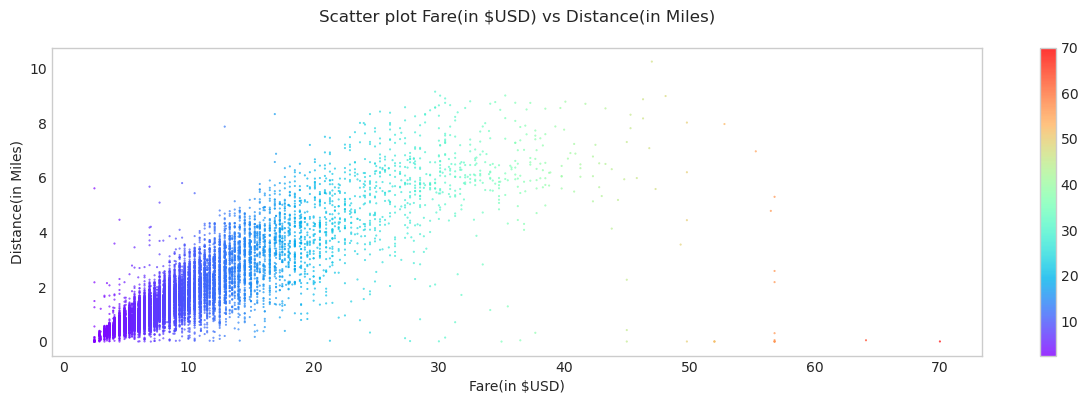

In [33]:
plt.figure(figsize=(15,4))

plt.scatter(year2012_insight.fare_amount, year2012_insight.distance, c=year2012_insight.fare_amount, 
            cmap=plt.cm.rainbow, alpha=0.8, s=1, marker=".")
plt.xlabel("Fare(in $USD)")
plt.ylabel("Distance(in Miles)")
plt.title("Scatter plot Fare(in $USD) vs Distance(in Miles)\n")
ol = plt.grid(False)
plt.colorbar(ol)
plt.show()

By seeing this data we can sumarize:

1. There are trips with zero distance but with a non-zero fare. Could this be trips from and to the same location? Predicting these fares will be difficult as there is likely not sufficient information in the dataset.

2. Overall there seems to be a (linear) relation between distance and fare.

3. Initial charge for most rides is $2.50 upon entry

4. And it also seems that someone has paid way too much (>120$)

<b><em>Note: the calculated distance in the dataset is from point to point. In reality, the distance measured by road is larger.</em></b>

In [34]:
# remove datapoints with distance < 0.05 miles

print("Old size: ", len(year2012_insight))
train_df = year2012_insight[year2012_insight.distance >= 0.05]

print("New size: ", len(train_df))

Old size:  14175
New size:  14116


<a id="model"></a>
<div style="background:#ffbf00; height:65px; width:65px; margin:0 0 -70px -10px;"></div>
<div style="background:url('https://media.giphy.com/media/qgQUggAC3Pfv687qPC/giphy.gif') no-repeat; height:60px; margin-bottom:-65px; background-size:contain; background-position:right"></div>

## 5. Model (for the year 2012 only)
<div style="background:#ffbf00; height:3px; width:70%; margin-left:-10px"></div>
<em><b>Due too the large volume of dataset this notebook was constantly crashing, so in here we are only gonna use the data of year 2012 </b></em>

<div style="background:#ffbf00; padding:20px; font-size:20px">
    Based on the analysis we can build a BaseLine model that will be
    <p style="text-align:center; margin:20px; font-weight: 600;     font-style: italic;">Model : fare_amount(x) ~ [year, hour, distance, passenger_count]</p>
    and for that we gonna be using the <strong><em>Linear Regression Model</em></strong>
</div>

<a id="genTData"></a>
<div style="background: #ffbf00; height:30px; width:70%; margin:0 0 -50px -10px;"></div>

### 5. 1. Generate the <em><b>test</b></em> data

In [35]:
model_data = train_df[['year', 'hour', 'distance', 'passenger_count', 'fare_amount']]

In [36]:
model_data.head()

year  hour  distance  passenger_count  fare_amount
45533163  2012    13  0.911264                1          8.0
36346445  2012     9  2.369445                3          9.5
12868476  2012    11  0.575601                5          4.9
31059376  2012    20  4.048422                1         18.0
45588758  2012     8  0.930483                1          6.5

<a id="dSplit"></a>
<div style="background: #ffbf00; height:30px; width:70%; margin:0 0 -50px -10px;"></div>

### 5. 2. Train, test split of the datasets

In [37]:
X = model_data[['year', 'hour', 'distance', 'passenger_count']]
y = model_data[['fare_amount']]

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

<a id="mRun"></a>
<div style="background: #ffbf00; height:30px; width:70%; margin:0 0 -50px -10px;"></div>

### 5. 3. Model Run

In [39]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

model_lin = Pipeline((
        ("standard_scaler", StandardScaler()),
        ("lin_reg", LinearRegression()),
    ))
model_lin.fit(X_train, y_train)

Pipeline(steps=[('standard_scaler', StandardScaler()),
                ('lin_reg', LinearRegression())])

<a id="mScore"></a>
<div style="background: #ffbf00; height:30px; width:70%; margin:0 0 -50px -10px;"></div>

### 5. 4. Model Score

In [40]:
from sklearn.metrics import r2_score

y_test_pred = model_lin.predict(X_test)
score = r2_score(y_test, y_test_pred)
print("The accuracy of our model is {}%".format(round(score, 2) *100))

The accuracy of our model is 76.0%


<a id="mSave"></a>
<div style="background: #ffbf00; height:30px; width:70%; margin:0 0 -50px -10px;"></div>

### 5. 5. Model Save

Save the model for later use.

In [41]:
import pickle
filename = 'LR_NYC_trainedM.sav'
pickle.dump(model_lin, open(filename, 'wb'))

<a id="conclusion"></a>
<div style="background:#ffbf00; height:65px; width:65px; margin:0 0 -70px -10px;"></div>
<div style="background:url('https://media.tenor.com/6NN1DAl9rTAAAAAi/ehem-trixie-tang.gif') no-repeat; height:60px; margin-bottom:-65px; background-size:contain; background-position:right"></div>

## 6. Conclusion

<div style="background:#ffbf00; height:3px; width:70%; margin-left:-10px"></div>

<div style="font-size:15px; text-align:justify">
<p>From all these analysis we have made a <em><b style="color:#ffbf00;">Linear Regression Model</b></em> to predict the NYC Taxi Fare price. But though lot more can done and the prediction can be made much better.</p>

<p>
Thanks to <em><b style="color:#ffbf00;">@breeman</b></em> for making the <em><b style="color:#ffbf00;">NYC Taxi Fare - Data Exploration notebook</b></em>, learned many new things from it and applied into my notebook.
</p>
</div>

<p style="text-align:center; margin-right:50px"><img src="https://media.tenor.com/nu9XqB4pQGsAAAAi/line-sticker-thank-you-sticker.gif"></p>


<div style="background:#ffbf00; width:100%; padding:20px 0; text-align:center; font-size:15px">Thankyou! For viewing this Notebook, do upvote if you liked it. Please feel free to provide any feedback!… 😄</div>